# Fundamentals of Data Analysis Assessment 2019 - Tips Dataset 

## Introduction 
In the US, the tip rate for restaurants with table service is 15% or more of the bill, based on the quality of service. If you receive exceptional service, 20-25% is customary[8]. Tips in restaurants are influenced by many factors including type of restaurant, quality of food and most importantly service.  One waiter recorded 244 tips and several variables over a 2.5 month period working in one restaurant. The restaurant located in a suburban shopping mall, was one of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking section to patrons who requested it. The data was assigned to those days and during those times when the food server was routinely assigned to work [10].  The data was reported in a collection of case studies for business statistics [9]. 

Service is subjective and relates to an overall experience.  However, is it possible to isolate the criteria that govern tip rate and increase pay for the server or increase revenue for the restaurant? This project interrogates the tips [6] dataset and utilises Python [1] packages, seaborn [5] and jupyter [4] to analyse if variables influence tip %. 

## Import libraries

In [1]:
# Import numpy, matplotlib, seaborn and pandas
import numpy as np
import matplotlib as plt
# Make matplotlib show interactive plots in the notebook.
%matplotlib inline
import seaborn as sns
import pandas as pd

## Raw Data

In [2]:
# import tips dataset and call it tips
tips = pd.read_csv("https://github.com/mhurley100/Fundamentals-of-Data-Analysis-Project/raw/master/tips.csv")

In [3]:
# Visually view the dataset
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### Format of the dataset

The controls in the dataset are the waiter and the restaurant.  It is assumed that the same quality of food and service is provided to all customers which is difficult to achieve due to a variety of subjective factors e.g. chef that is on duty, cleaning staff etc.

The dataset itself comprises 244 rows and 7 columns.  

4 columns are categories/objects:
 - sex
 - smoker
 - day
 - time
 
3 columns are numeric:
 - total_bill (float)
 - tip (float)
 - size (integer)

## Descriptive statistics

In [5]:
# Describe the dataset using pandas describe()
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


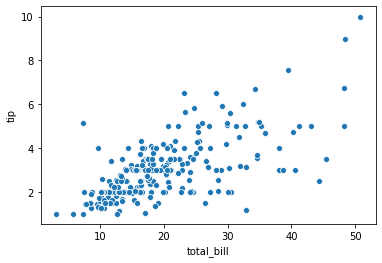

In [6]:
# Plot multiple seaborn histogram in single graph
sns.scatterplot(x='total_bill',y='tip',data=tips)

### Observations of the dataset

 - All groups paid a tip
 - The average bill is 19.79  
 - The average tip is 3.00 or 15.2%
 - Minimum tip is 1.00 
 - Maximum tip is 10.0
 - Average party size is 2.5

The restaurant appears to be inexpensive with an average bill of 19.79.  Therefore the key to higher revenue and tips is customer numbers.  Average tip is 15.2 % which is representative of the cultural expectation of 15%.  However we need to dig a bit deeper to investigate if there are any underlying trends or dynamics that are influencing the tip received. If a strong correlation can be demonstrated, underlying relationships can be investigated.   

## Regression

Is there a relationship between bill and tip amount? It does appear that to pay a tip is ingrained into customers but their experience will dictate if they pay more or less. It is time to isolate and understand the effects of individual variables,

Add tip%

In [7]:
tips["tip_%"] = tips["tip"] / tips["total_bill"]

## Analysis of Tips Dataset

In [8]:
# Split the data by day and time using groupby.
tips.groupby(['time', 'day']).size()

time    day 
Dinner  Fri     12
        Sat     87
        Sun     76
        Thur     1
Lunch   Fri      7
        Thur    61
dtype: int64

### Slice the Data by  Day and Time
Pandas[7] groupby function is used to slice the data.

 - Thursday is the busiest day for lunch with 61 groups served.  
 - Only 7 groups had lunch on Friday. 
 - No one was served lunch Saturday or Sunday.
 - Thursday dinner only had one group.  
 - Saturday and Sunday are the busiest times for dinner.  
 
 Let's see if the tip  amounts correlate i.e Thursday lunch and Saturday and Sunday dinner time produce the highest tips.

In [9]:
tips.groupby(['day', 'time']).sum()

total_bill     tip  size      tip_%
day  time                                       
Fri  Dinner      235.96   35.28    26   1.906993
     Lunch        89.92   16.68    14   1.321354
Sat  Dinner     1778.40  260.40   219  13.324199
Sun  Dinner     1627.16  247.39   216  12.684194
Thur Dinner       18.78    3.00     2   0.159744
     Lunch      1077.55  168.83   150   9.839345

### Slice the Data by  Day and Time
Pandas[7] groupby function is used to slice the data.

 - 168.83 received in tips on Thurday lunchtime.  
 - 260.40 and 247.39 received for Saturday and Sunday dinner respectively.
 
 - No one was served lunch Saturday or Sunday meaning the server received no tips. This is very odd given that weekends should be the busiest time for restaurants.  It would seem that the restaurant is not attractive to young families or teenagers who would tend to go on outings at the weekend in particular at lunch.

In [10]:
# Split the data by gender and smoker using groupby.
tips.groupby(['sex', 'smoker']).sum()

total_bill     tip  size      tip_%
sex    smoker                                     
Female No          977.68  149.77   140   8.473732
       Yes         593.27   96.74    74   6.010962
Male   No         1919.75  302.00   263  15.584865
       Yes        1337.07  183.07   150   9.166271

### Slice the Data by Gender and Smoker status
Using Pandas[7] groupby function to slice the data by gender and smoker status.  
- The highest tips received were from male non smokers.  
- The second highest tips were from male smokers.
- The third highest were female non smokers
- The lowest tips received were from female smokers

The data does not provide a breakdown of gender within the groups therefore it cannot be categorically stated that gender has an impact.  Likewise smoker status - there may be a breakdown of smokers and non smokers within the group.  Also perhaps a number groups had to sit in the smoking section due to non availability of tables in the non smoking section.

In [11]:
tips.groupby(['size']).sum()

,total_bill,tip,tip_%
size,,,
1,28.97,5.75,0.869168
2,2565.89,402.84,25.852194
3,884.55,128.94,5.781960
4,1058.70,153.01,5.400113
5,150.34,20.14,0.707477
6,139.32,20.90,0.624917


### Slice the Data by Size
Most of the tips received are from party sizes of 2 - 402.84 was received in tips.  Behind this are groups of 4 tipping 153.01.  The restaurant is therfore attractive to couples or it is unable to cater effectively for larger group sizes

## Plot group size

The categories of gender and smoker status are not definitive as the breakdown within the group is not given.  The restaurant is popular for groups of 2 for Thursday lunch and Saturday and Sunday dinners. Visually analyse the datset

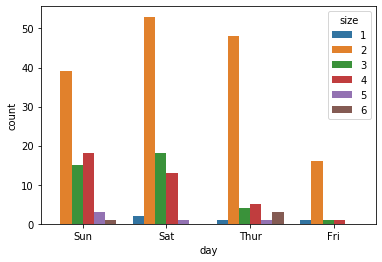

In [12]:
sns.countplot(x='day',hue='size' ,data=tips)

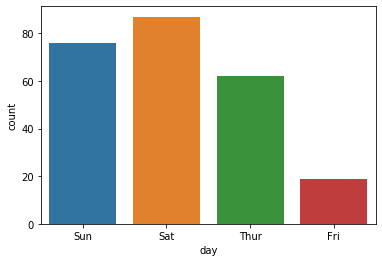

In [13]:
sns.countplot(x='day' ,data=tips)

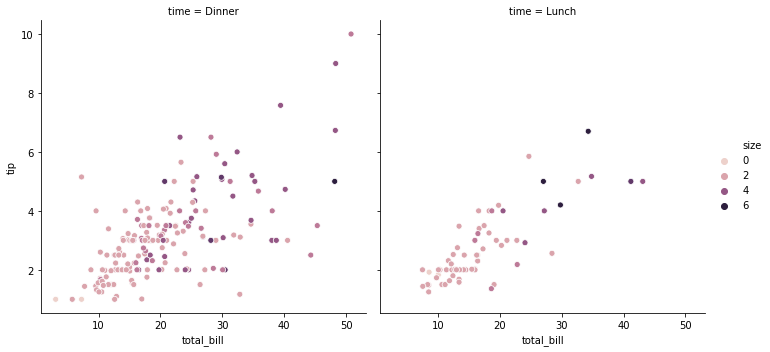

In [14]:
sns.relplot(x='total_bill',y='tip',hue='size',col='time',data=tips)

A strong correlation can be demonstrated between total bill and tip.  As a result underlying relationships can be investigated. Often, logic wins through and it is fully understood that the correlation is accurate and the plots are simply establishing the strength of the relationship. But it is quite feasible that the input variable actually interacts with another (unconsidered) input variable to give the reported response in output. (Ambience)
It is also wise to remember that there is often a time interval between a cause and an effect and so occurrence of a simple cause may actually require a chain of events to lead to the resultant effect.


Observations:
- Everyone left a tip
- Friday lunch is highest tip
- Split of gender is not given
- Smoking and non smoking section

do smokers / non smokers tip differently or if siz of group is influences amount.  Gender is not so easy as the breakdown of groups is not given.    

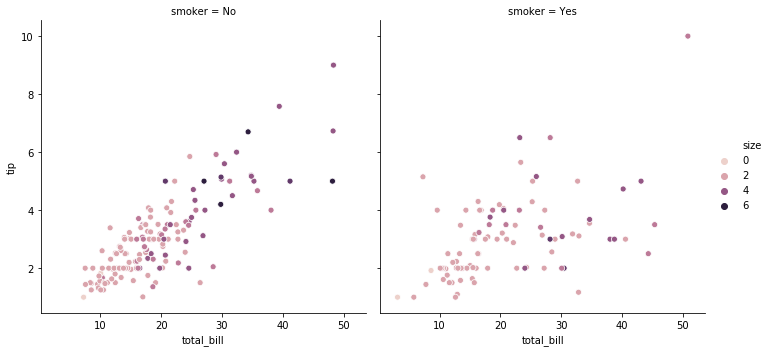

In [15]:
sns.relplot(x='total_bill',y='tip',hue='size',col='smoker',data=tips)

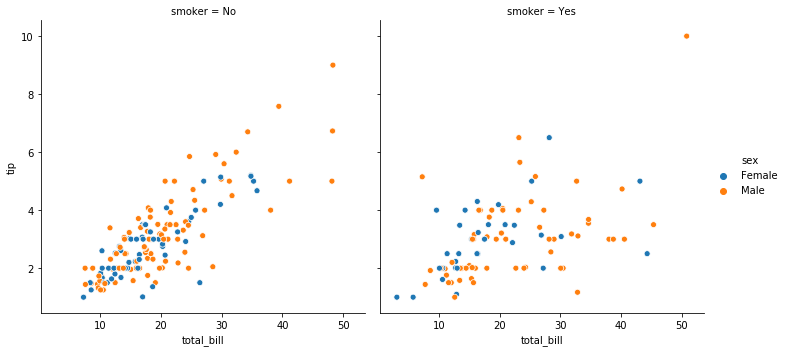

In [16]:
sns.relplot(x='total_bill',y='tip',hue='sex',col='smoker',data=tips)

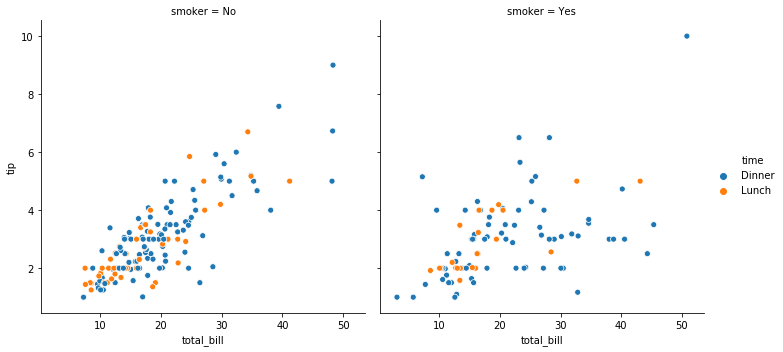

In [17]:
sns.relplot(x='total_bill',y='tip',hue='time',col='smoker',data=tips)